# Holly Figueroa
# DSC 550 Milestone 1: Employee Mental Health & Workplace MH Culture

### *Milestone Requirements*
*Begin Milestone 1 with a ***250-500-word narrative*** describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model. Then, do **a graphical analysis creating a minimum of four graphs**. Label your graphs appropriately and **explain/analyze the information provided by each graph**. Your analysis should begin to answer the question(s) you are addressing. **Write a short overview/conclusion** of the insights gained from your graphical analysis.*

### Narrative  
Mental health struggles have been long stigmatized within society despite its prevalence across populations. As companies compete to retain effective talent, workplace mental health culture may be added to the list of qualities that set one company apart from another. The analyses done for this project will assume that a company will be interested in better supporting employee mental health as it pertains to work culture, productivity, retention, and attracting new hires. 

First it must be established that mental health is a prevalent issue warranting employer attention. If it is, creating a better workplace culture around mental health requires employee perceptions be explored as well as company practices.  I have survey data results from workers, with a variety of employers, mostly in the tech field. My dataset contains a variety of features that seek to capture prevalence of mental health concerns as well as perceptions of how their employer values mental health through culture, benefits, and accommodations. Nearly all variables in the dataset are categorical. Many are based on Likert responses, some binary, some organized, some not.  Given the data types and available labeled data for target features, classifier modeling appears to be the best choice. 

A model to capable of classifying those with high rates of work interference from mental health can be used inform company practices. By creating the best working model to predict mental health interference as its target, an employer can begin to evaluate features against their own workplace practices, culture, and benefits to improve employee wellness and performance. To achieve a quality model the following questions will be examined from the dataset:

* How common is work interference due to mental health?
* Is work interference related to the perception of negative consequences for talking about mental health needs?
* Is work interference distributed differently for employees that work remotely?
* How are features of interest distributed?
* What features cooperate best to predict work interference?
* What features are closely related/redundant and may need to be removed?
* Are the best features to predict work interference different for employees who work from home?

After EDA, analysis will begin with targeting work interference, but it may be preferable for a company to target an employee's perceptions of negative consequences from discussing mental health with supervisors. While an employee may privately choose to forgo resources, treatment, or employer accommodations for mental health, their sense of safety to discuss concerns could reflect the most about company culture around mental health than anything else. 

### EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load file created of variable despriptions for reference - 
var_info = pd.read_csv('var_info_df.csv')

# Load csv data file in to df
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# View shape
df.shape

(1259, 27)

In [4]:
# Display variables and their descriptions for reference
with pd.option_context('display.max_colwidth', None):
  display(var_info.style.set_properties(**{'text-align': 'left'}))

,Variable,Survey Question
0,Age,nan
1,Gender,nan
2,Country,nan
3,state,"If you live in the United States, which state or territory do you live in?"
4,self_employed,Are you self-employed?
5,family_history,Do you have a family history of mental illness?
6,treatment,Have you sought treatment for a mental health condition?
7,work_interfere,"If you have a mental health condition, do you feel that it interferes with your work"
8,no_employees,How many employees does your company or organization have?
9,remote_work,Do you work remotely (outside of an office) at least 50% of the time?


In [5]:
# Create subset of columns to view certain value counts (exclue timestamp, age, and comments)
dfcounts = df.iloc[:,2:-1]

In [6]:
# Itereate over columns and print val counts to get a clearer look at categorical variables
for col in dfcounts:
    print ('{:_^30}'.format(col).upper())
    print(dfcounts[col].value_counts(),'\n')

____________GENDER____________
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Man                                                 2
Cis Male                                            2
Female (trans)                                      2
Mail                                                1
Female (cis)                                        1
Male-ish                                           

In [7]:
# Check Age responses
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [8]:
# Use filter out value errors using a value range
df = df[(df['Age'] >= 14) & (df['Age'] <= 100)]

Text(0.5, 1.0, 'Respondent Age')

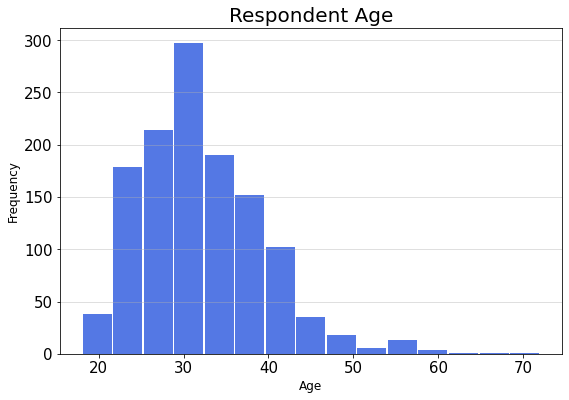

In [9]:
# Create Histogram
fig = plt.figure(figsize =(9,6))
plt.hist(x=df['Age'], 
            bins=15, 
            color='royalblue',
            alpha=0.9, 
            rwidth=0.95)

# Create grid and label features for histogram
plt.grid(axis='y', alpha=0.5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age',  fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Respondent Age', fontsize = 20)

The histogram above shows the frequecies for age of respondents in the data set after filtering a reasonable range of ages 14-100yrs old. The distribution of ages appears positively skewed, as would be expected for a working population. The ages's mode appears to fall around 30yrs, and the skew likely sending the average higher than 30yrs of age. The visual lends confidence that the sample pool is representative enough for this analysis. 

In [10]:
# Explore the prevealence of work interference and if the prevalence is different for remote employees
# Create variable to store value counts for work interference and view
interfere = df['work_interfere'].value_counts()
interfere

Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

In [11]:
# Store value counts for work interference grouped by remote work status and view
interfere2 = df.groupby('remote_work')['work_interfere'].value_counts()
interfere2

remote_work  work_interfere
No           Sometimes         321
             Never             157
             Rarely            119
             Often              92
Yes          Sometimes         143
             Never              55
             Rarely             54
             Often              48
Name: work_interfere, dtype: int64

In [12]:
# Compare counts using percentages
# Get percentage of all employees reporting often or sometimes work interference from mental health
pc_interfere = (((465+144)/interfere.sum()) * 100)

# Get percentage of tech employees reporting often or sometimes work interference from mental health
pc_remote = (((143+51)/(143+56+54+51)) * 100)

print(round(pc_interfere,2) ,'perent of ALL employees report work interference due to mental health sometimes or often')
print(round(pc_remote,2), 'perent of REMOTE employees report work interference due to mental health sometimes or often')

61.58 perent of ALL employees report work interference due to mental health sometimes or often
63.82 perent of REMOTE employees report work interference due to mental health sometimes or often


In [13]:
# Create Bar chart arrays
# Subset remote workers and get array of value counts for work interference
remote_int = df[df['remote_work']== 'Yes']
remote_int['work_interfere'].value_counts()


Sometimes    143
Never         55
Rarely        54
Often         48
Name: work_interfere, dtype: int64

In [14]:
# Reset Index
remote_int = remote_int['work_interfere'].value_counts().reset_index()
# Add column to sort bars in order of severity
remote_int['Order'] = [3,1,2,4]
# Sort and view
remote_int = remote_int.sort_values(by = 'Order')
remote_int

,index,work_interfere,Order
1,Never,55,1
2,Rarely,54,2
0,Sometimes,143,3
3,Often,48,4


In [15]:
# Create secondary Bar chart arrays for stacking
# Subset remote workers and get array of value counts for work interference
office_int = df[df['remote_work']== 'No']
office_int['work_interfere'].value_counts()

Sometimes    321
Never        157
Rarely       119
Often         92
Name: work_interfere, dtype: int64

In [16]:
# Reset Index
office_int = office_int['work_interfere'].value_counts().reset_index()
# Create new column to be able sort order of table bars
office_int['Order'] = [3,1,2,4]
# Sort and view
office_int = office_int.sort_values(by = 'Order')
office_int

,index,work_interfere,Order
1,Never,157,1
2,Rarely,119,2
0,Sometimes,321,3
3,Often,92,4


In [17]:
office = office_int.iloc[:,1]
office

1    157
2    119
0    321
3     92
Name: work_interfere, dtype: int64

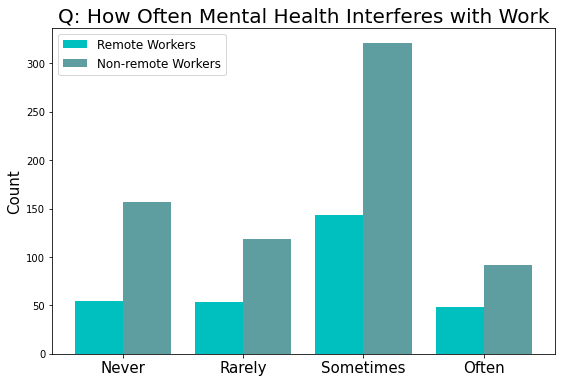

In [18]:
# Create Bar Chart to Visualize distributions for work interference
# Using Dual Bars to compare remote and non remote worker distributions

# Make data arrays
office = office_int.iloc[:,1]
remote = remote_int.iloc[:,1]
x = office_int['index']

# Size 
plt.figure(figsize= (9,6))

# Set columns
N = 4
ind = np.arange(N) 
width = 0.4

# Set bars
bar1 = plt.bar(ind, remote, width, color = 'c')
bar2 = plt.bar(ind+width, office, width, color='cadetblue')

# Create Titles, Axis Labels, and Legend
plt.title('Q: How Often Mental Health Interferes with Work', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
  
plt.xticks(ind+.2, x, fontsize = 15)
plt.legend((bar1, bar2), ('Remote Workers', 'Non-remote Workers') , fontsize = 12)
plt.show()

In [19]:
usa_df = df[df['Country'] == 'United States']

The bar chart above examines responses of how often mental health causes interferece in work. The majority of respondents reported 'Sometimes". If we examine the range of responses it is easy to see, that only minority 'never' experience interference which highlights the that vast majority of employees would benefit from having a workplace willing to support and improve mental health. The graph also examines how the distribution of responses differes for those that work from home and they visually appear, proportionate. This suggests that working from home does not necessarily mean less interference from mental health struggles. 

In [20]:
# Explore relationship between work interference and perceptions of negative consequences.
# first view the distribution of negative perceptions with a pie chart
neg_val_counts = df['mental_health_consequence'].value_counts()

In [21]:
# View Counts
neg_val_counts

No       487
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

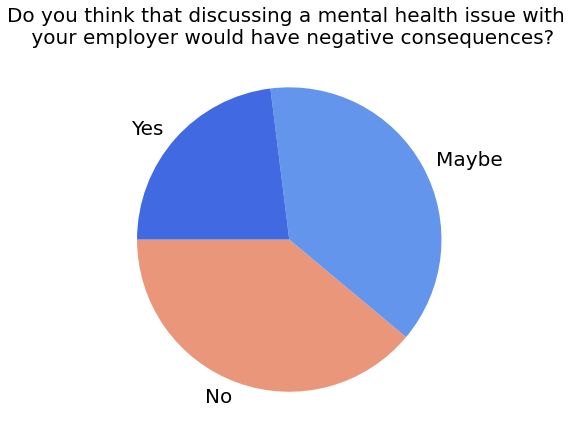

In [108]:
# Create Pie Chart
# Pick Colors
colors = ['darksalmon', 'cornflowerblue','royalblue' ]

# Create plot
fig = plt.figure(figsize =(10, 7))
plt.pie(neg_val_counts, 
        labels = neg_val_counts.index, 
        colors = colors,
        startangle = 180, 
        textprops = {'fontsize':20})

# Use survey question for title
plt.title("Do you think that discussing a mental health issue with \n your employer would have negative consequences?",
         fontsize = 20)  

# show plot
plt.show()

The pie chart above simply illustrates how employees view the prospect of discussing their mental health with their employer. A little under a quarter of employees feel there would be negative consequences for discussing a mental health issue. However, uncertainty is of equal concern. The graph essentially shows that majority of employees feel either their own mental health is either an unsafe to topic about, or apotentially unsafe topic. 

In [23]:
# Create Bar chart to compare work interference along side atitudes of negative consequences
# Subset consequence responses for yes and no separately
yes_con = df[df['mental_health_consequence']== 'Yes']
no_con = df[df['mental_health_consequence'] == 'No']

# View counts to choose numbers to rearrange rows for bars
yes_con['work_interfere'].value_counts()


Sometimes    134
Often         47
Never         38
Rarely        37
Name: work_interfere, dtype: int64

In [24]:
# Create count as new var and Reset Index 
yes_count= yes_con['work_interfere'].value_counts().reset_index()
# Add column to sort bars in order of severity
yes_count['Order'] = [3,4,1,2]

# Sort and view
yes_sorted= yes_count.sort_values(by = 'Order')
yes_sorted

,index,work_interfere,Order
2,Never,38,1
3,Rarely,37,2
0,Sometimes,134,3
1,Often,47,4


In [25]:
# Check counts for no responses to create new order column later
no_con['work_interfere'].value_counts()

Sometimes    145
Never         96
Rarely        71
Often         41
Name: work_interfere, dtype: int64

In [26]:
# Create new vars and Reset Index 
no_count= no_con['work_interfere'].value_counts().reset_index()
# Add column to sort bars in order of severity
no_count['Order'] = [3,1,2,4]

# Sort and view
no_sorted= no_count.sort_values(by = 'Order')
no_sorted

,index,work_interfere,Order
1,Never,96,1
2,Rarely,71,2
0,Sometimes,145,3
3,Often,41,4


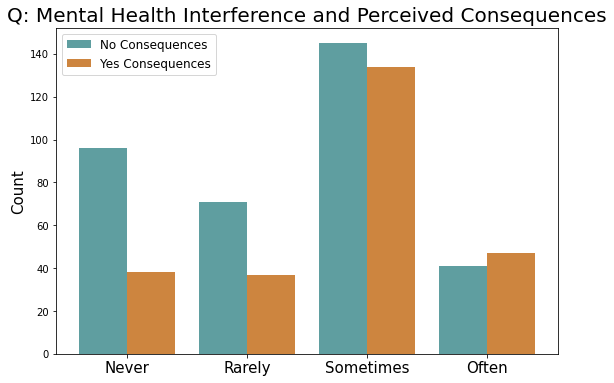

In [27]:
# Make data arrays
yes = yes_sorted.iloc[:,1]
no = no_sorted.iloc[:,1]
x = office_int['index']

# Size 
plt.figure(figsize= (9,6))

# Set columns
N = 4
ind = np.arange(N) 
width = 0.4

# Set bars
bar1 = plt.bar(ind, no, width, color = 'cadetblue')
bar2 = plt.bar(ind+width, yes, width, color='peru')


# Create Titles, Axis Labels, and Legend
plt.title('Q: Mental Health Interference and Perceived Consequences', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
  
plt.xticks(ind+.2, x, fontsize = 15)
plt.legend((bar1, bar2), ('No Consequences', 'Yes Consequences') , fontsize = 12)
plt.show()

The graph above illustrates how distributions for work interference differ between groups. One group being those that report anticipating no negative consequences due to discussing their mental health, and one group that does. The visualization show one difference of note, for those who report interference from mental health often. The difference suggests that those with more incidents, or experience with mental health struggles, feel less confident they can talk with their employers about it without risk. 

### Concluding Remarks  
The graphs completed appear to lend confidence that our sample ages are reflective of workplaces ages. The visuals also lend confidence that mental health struggles, are indeed, a common experience which interferes with work performance. The visuals also showed that the majority of workers are not confident they can talk to their employer about their mental health without consequence.

# DSC 550 Milestone 2  
**After completing Milestone 2, your data should be ready for the model building/evaluation phase.**  
*Drop any features that are not useful for your model building and explain why they are not useful.  
Perform any data extraction/selection steps.  
Transform features if necessary.  
Engineer new useful features.  
Deal with missing data (do not just drop rows or columns without justifying this).  
Create dummy variables if necessary.*  

### Rationale for Feature Removals/Changes
If any model created to predict work interference is to be of use to a company, features must be limited to aspects a company can influence. My first feature is a timestamp, given this information does not logically translate into company policy insights, it will be left out. Features for gender, age, treatment, and family history of mental illness might prove to be significant predictors for work interference, however, they offer no actionable insights as features. We will assume the company does not wish the ethical dilemna of using gender, age, treatment, or family medical history to inform any company practices to reduce work interference. For these reasons, the features will be kept out of modeling efforts. 

The feature for 'tech-company' provides no practical insight as a company could not be recommended to change it's industry type, so this will be excluded. Features for country and state (if in the US), pose similar issues regarding practical insight for a company. However, some of this information can be repurposed before it is dropped. The current dataset contains values regarding employer health benefits. It asks workers if their employer offers a wellness program, if they offer mental health care benefits, and if they are aware of mental health care options provided by their employer. However, the survey does not appear to directly take into account that not all countries rely equally on privatized healthcare, or employer provided insurance. 

In an effort to mitigate any effects from this, I intend to import data from the World Health Organization. The data I have obtained simply lists countries, and whether or not they have passed legislation committing to universal healthcare for it's citizens. The source data is not nuanced, but it may help. The country feature will allow me to merge this new information. The new feature may offer a small layer of insight into whatever relationship there may or may not be between healthcare benefits and work interference.

### Expand dataset to include WHO data (merge)

In [28]:
# Read csv file on from w.h.o. to get countries and healthcare system
who_df = pd.read_csv('whodata.csv')

In [29]:
# View column names and indices to pull only columns I need "value" and "location"
for col in who_df.columns:
    index_no = who_df.columns.get_loc(col)
    print(index_no , col, )

0 IndicatorCode
1 Indicator
2 ValueType
3 ParentLocationCode
4 ParentLocation
5 Location type
6 SpatialDimValueCode
7 Location
8 Period type
9 Period
10 IsLatestYear
11 Dim1 type
12 Dim1
13 Dim1ValueCode
14 Dim2 type
15 Dim2
16 Dim2ValueCode
17 Dim3 type
18 Dim3
19 Dim3ValueCode
20 DataSourceDimValueCode
21 DataSource
22 FactValueNumericPrefix
23 FactValueNumeric
24 FactValueUoM
25 FactValueNumericLowPrefix
26 FactValueNumericLow
27 FactValueNumericHighPrefix
28 FactValueNumericHigh
29 Value
30 FactValueTranslationID
31 FactComments
32 Language
33 DateModified


In [30]:
# View values counts for 'value'
who_df['Value'].value_counts()

No     121
Yes     73
Name: Value, dtype: int64

In [31]:
# Use only two columns specified
who_df = who_df.iloc[:,[7,29]]
who_df.head()

,Location,Value
0,Afghanistan,No
1,Albania,No
2,Angola,No
3,Bahamas,No
4,Bangladesh,No


In [32]:
# Merge WHO list of countries/healthcare values with dataframe 
# use indicator param to find unmatched country names
merged_df = pd.merge(df, who_df , left_on=['Country'], right_on=['Location'], how = 'left', indicator = True)
merged_df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Location,Value,_merge
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Some of them,Yes,No,Maybe,Yes,No,NaN,NaN,NaN,left_only
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,No,No,Don't know,No,NaN,NaN,NaN,left_only
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Yes,Yes,Yes,Yes,No,No,NaN,Canada,Yes,both


In [33]:
# View dataframe of unmatched country names only - use results to replace name values with shared values
unmatched = merged_df[merged_df['_merge'] == 'left_only']
unmatched['Country'].value_counts()

United States     746
United Kingdom    184
Russia              3
Czech Republic      1
Moldova             1
Name: Country, dtype: int64

In [34]:
# Compare unmatched country names with names used for Location in the WHO df
who_df['Location'].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Bahamas', 'Bangladesh',
       'Barbados', 'Belize', 'Benin', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'China', 'Comoros', 'Cook Islands', 'Côte d’Ivoire',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti', 'Dominica',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia',
       'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel',
       'Jamaica', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands',
       'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia (F

In [35]:
# Replace unmatched names with WHO df Country names
df['Country'] = df['Country'].replace('Czech Republic', 'Czechia')
df['Country'] = df['Country'].replace('Moldova', 'Republic of Moldova')
df['Country'] = df['Country'].replace('Russia', 'Russian Federation')
df['Country'] = df['Country'].replace('United States', 'United States of America')
df['Country'] = df['Country'].replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')

In [36]:
# Merge who list of countries/healthcare values with dataframe and 
# use indicator param to find unmatched country names
merged_df = pd.merge(df, who_df , left_on=['Country'], right_on=['Location'], how = 'left', indicator = True)

In [37]:
# Confirm df is merged completely 
merged_df['_merge'].value_counts()

both          1251
left_only        0
right_only       0
Name: _merge, dtype: int64

In [38]:
# confirm row count is consistent after merge
df.shape, merged_df.shape

((1251, 27), (1251, 30))

### Dropping features that cannot offer actionable conclusions

In [39]:
# View column names and indices to pull only columns I need "value" and "location"
for col in merged_df.columns:
    index_no = merged_df.columns.get_loc(col)
    print(index_no , col, )

0 Timestamp
1 Age
2 Gender
3 Country
4 state
5 self_employed
6 family_history
7 treatment
8 work_interfere
9 no_employees
10 remote_work
11 tech_company
12 benefits
13 care_options
14 wellness_program
15 seek_help
16 anonymity
17 leave
18 mental_health_consequence
19 phys_health_consequence
20 coworkers
21 supervisor
22 mental_health_interview
23 phys_health_interview
24 mental_vs_physical
25 obs_consequence
26 comments
27 Location
28 Value
29 _merge


In [40]:
# Check comment values
len(merged_df['comments'].unique())

158

In [41]:
# Filter column range to keep
merged_df = merged_df.iloc[:,8:]
# Drop other columns by name
merged_df = merged_df.drop(columns = ['comments', 'Location', '_merge', 'tech_company'], axis = 1)

In [42]:
merged_df = merged_df.rename(columns ={'Value': 'universal_hc'})

### Encoding for Categorical Variables   
Some extra care will be given to this section of transformations as all my chosen features are categorical in some way. I will work to reduce the columns by only using one-hot-encoding where other methods are not more appropriate. Some variables are binary in their organized responses. Others have a range of responses which are clearly ordinal while others are ordinal intuitively, similarly to likert response data. Many responses however, that would be seen as likert data responses include "I don't know" responses. These cases are different as they not only capture a trait of a company, but also capture knowledge of the responder. These are not the same and "I don't know" neither works as a missing value (it is a value itself worth knowing), and it does not fit ordinally at the ends or center of the range of "yes" and "no". So, these features will be one-hot encoded.

In [43]:
# Display variables and their descriptions for reference
with pd.option_context('display.max_colwidth', None):
  display(var_info.style.set_properties(**{'text-align': 'left'}))

,Variable,Survey Question
0,Age,nan
1,Gender,nan
2,Country,nan
3,state,"If you live in the United States, which state or territory do you live in?"
4,self_employed,Are you self-employed?
5,family_history,Do you have a family history of mental illness?
6,treatment,Have you sought treatment for a mental health condition?
7,work_interfere,"If you have a mental health condition, do you feel that it interferes with your work"
8,no_employees,How many employees does your company or organization have?
9,remote_work,Do you work remotely (outside of an office) at least 50% of the time?


In [44]:
for col in merged_df:
    print ('{:_^30}'.format(col), col.index)
    print(merged_df[col].value_counts(),'\n')

________work_interfere________ <built-in method index of str object at 0x0000019F8D3F5CF0>
Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64 

_________no_employees_________ <built-in method index of str object at 0x0000019F8D3E7530>
6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: no_employees, dtype: int64 

_________remote_work__________ <built-in method index of str object at 0x0000019F8D3F5D30>
No     880
Yes    371
Name: remote_work, dtype: int64 

___________benefits___________ <built-in method index of str object at 0x0000019F8D3F5DB0>
Yes           473
Don't know    407
No            371
Name: benefits, dtype: int64 

_________care_options_________ <built-in method index of str object at 0x0000019F8D3F5DF0>
No          499
Yes         439
Not sure    313
Name: care_options, dtype: int64 

_______wellness_program_______ <built-in method i

### Binary Encoding
Only three columns are suitable for binary coding. Those are remote_work, universal_hc (the imported WHO data), and observed consequences. All of these include a yes/no range without 'maybes' or 'I don't knows"

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
# Dummy code binary responses features with yes/no answers
merged_df = pd.get_dummies(merged_df, 
                           columns = ['remote_work', 'universal_hc', 'obs_consequence'], 
                           prefix_sep = "_", 
                           drop_first = True
                          )

### Ordinal Encoding
After reviewing the unqiue values and survey questions, I have found a small subset of columns that can be ordinally coded to reduce use of one-hot encoding. 

In [47]:
# Ordinal code relevant features and override the default ordering by making ordered arrays first
# Create array for desired order of values for work_interfere, number of employees, co-workers, and supervisor
work_int = ['Never','Rarely','Sometimes','Often']
num_emp = ['1-5','6-25','26-100','100-500', '500-1000', 'More than 1000']
coworkers = ['No', 'Some of them', 'Yes']
supervisor = ['No', 'Some of them', 'Yes']


# Create encoder object and pass arrays as categories
enc = OrdinalEncoder(categories = [work_int, num_emp, coworkers, supervisor], 
                     handle_unknown = 'use_encoded_value', 
                     unknown_value = np.nan)

In [48]:
# Fit the encorder to the dataset columns I want
enc.fit(merged_df[['work_interfere', 'no_employees','coworkers', 'supervisor']])

OrdinalEncoder(categories=[['Never', 'Rarely', 'Sometimes', 'Often'],
                           ['1-5', '6-25', '26-100', '100-500', '500-1000',
                            'More than 1000'],
                           ['No', 'Some of them', 'Yes'],
                           ['No', 'Some of them', 'Yes']],
               handle_unknown='use_encoded_value', unknown_value=nan)

In [49]:
# Create a 'before' view to compare changes for accuracy
merged_df[['work_interfere','no_employees', 'coworkers', 'supervisor']].head()

,work_interfere,no_employees,coworkers,supervisor
0,Often,6-25,Some of them,Yes
1,Rarely,More than 1000,No,No
2,Rarely,6-25,Yes,Yes
3,Often,26-100,Some of them,No
4,Never,100-500,Some of them,Yes


In [50]:
# Transform columns with the trained ordinal encoder
merged_df[['work_interfere','no_employees', 'coworkers', 'supervisor']] = enc.transform(merged_df[['work_interfere',
                                                                                                    'no_employees',
                                                                                                    'coworkers',
                                                                                                    'supervisor']])

In [51]:
# View changes after transformation validate they were encoded in the order I specified
merged_df[['work_interfere','no_employees', 'coworkers', 'supervisor']].head()

,work_interfere,no_employees,coworkers,supervisor
0,3.0,1.0,1.0,2.0
1,1.0,5.0,0.0,0.0
2,1.0,1.0,2.0,2.0
3,3.0,2.0,1.0,0.0
4,0.0,3.0,1.0,2.0


### One-Hot Encoding

In [52]:
# View column names and indices to pull only columns I need
for col in merged_df.columns:
    index_no = merged_df.columns.get_loc(col)
    print(index_no , col, )

0 work_interfere
1 no_employees
2 benefits
3 care_options
4 wellness_program
5 seek_help
6 anonymity
7 leave
8 mental_health_consequence
9 phys_health_consequence
10 coworkers
11 supervisor
12 mental_health_interview
13 phys_health_interview
14 mental_vs_physical
15 remote_work_Yes
16 universal_hc_Yes
17 obs_consequence_Yes


In [53]:
# Change columns names for readability after encoding
merged_df.rename(columns ={'mental_health_consequence':'MH_consequences', 
                           'phys_health_consequence':'PH_consequences',
                           'mental_health_interview':'MH_interview',
                           'phys_health_interview':'PH_interview',
                            'mental_vs_physical':'MvsP'}, errors = 'raise', inplace = True)

In [54]:
# Specify columns for one-hot encoding in a list format
hot = merged_df.iloc[:,[2,3,4,5,6,7,8,9,12,13,14,]].columns

In [55]:
# View list
hot

Index(['benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'MH_consequences', 'PH_consequences',
       'MH_interview', 'PH_interview', 'MvsP'],
      dtype='object')

In [56]:
# Get dummies for specific columns
merged_df = pd.get_dummies(merged_df, columns = hot, prefix_sep = '_')

In [57]:
# Check df
merged_df.head()

,work_interfere,no_employees,coworkers,supervisor,remote_work_Yes,universal_hc_Yes,obs_consequence_Yes,benefits_Don't know,benefits_No,benefits_Yes,...,PH_consequences_Yes,MH_interview_Maybe,MH_interview_No,MH_interview_Yes,PH_interview_Maybe,PH_interview_No,PH_interview_Yes,MvsP_Don't know,MvsP_No,MvsP_Yes
0,3.0,1.0,1.0,2.0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.0,5.0,0.0,0.0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.0,1.0,2.0,2.0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,3.0,2.0,1.0,0.0,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0
4,0.0,3.0,1.0,2.0,1,1,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0


In [58]:
merged_df.tail()

,work_interfere,no_employees,coworkers,supervisor,remote_work_Yes,universal_hc_Yes,obs_consequence_Yes,benefits_Don't know,benefits_No,benefits_Yes,...,PH_consequences_Yes,MH_interview_Maybe,MH_interview_No,MH_interview_Yes,PH_interview_Maybe,PH_interview_No,PH_interview_Yes,MvsP_Don't know,MvsP_No,MvsP_Yes
1246,NaN,2.0,1.0,1.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1247,3.0,2.0,1.0,2.0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1248,2.0,5.0,0.0,0.0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
1249,NaN,3.0,0.0,0.0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1250,2.0,2.0,1.0,0.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


### Handling Missing Values

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [60]:
# Check cols for missing values
merged_df.isnull().sum()

work_interfere                 262
no_employees                     0
coworkers                        0
supervisor                       0
remote_work_Yes                  0
universal_hc_Yes                 0
obs_consequence_Yes              0
benefits_Don't know              0
benefits_No                      0
benefits_Yes                     0
care_options_No                  0
care_options_Not sure            0
care_options_Yes                 0
wellness_program_Don't know      0
wellness_program_No              0
wellness_program_Yes             0
seek_help_Don't know             0
seek_help_No                     0
seek_help_Yes                    0
anonymity_Don't know             0
anonymity_No                     0
anonymity_Yes                    0
leave_Don't know                 0
leave_Somewhat difficult         0
leave_Somewhat easy              0
leave_Very difficult             0
leave_Very easy                  0
MH_consequences_Maybe            0
MH_consequences_No  

In [61]:
# Get shape to calculate percent missing values
merged_df.shape

(1251, 42)

In [62]:
print('Percentage of my target value missing = ',(merged_df['work_interfere'].isnull().sum()/merged_df.shape[0])*100)

Percentage of my target value missing =  20.943245403677057


### KNN Classifer to fill missing target values
Since my missing target values are over 20% of the total values, I will not drop them. A random guess for the correct target would have roughly 25% odd of being right, so I will use KNN Classifier to predict values that are missing.  

In [63]:
# Create df of rows without missing values only to use for training and testing
complete_df = merged_df[merged_df['work_interfere'].notnull()]

# Define features/Target
X = complete_df.drop(labels = 'work_interfere', axis = 1).values
y = complete_df['work_interfere'].values

In [64]:
# Create training and test data
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 987)

In [65]:
# Scale features
scaler = StandardScaler().fit(train_X)

In [66]:
# Transform training features with scaler
train_Xs = scaler.transform(train_X)

In [67]:
# Create Classifer and train
knn = KNeighborsClassifier(weights = 'distance')
knn.fit(train_Xs,train_y) 

KNeighborsClassifier(weights='distance')

In [68]:
# Transform test features with scaler
test_Xs = scaler.transform(test_X)

In [69]:
# Get r2 score
print("Test R2 Score =", cross_val_score(knn, test_Xs, test_y, scoring = 'r2').mean())
# Get RMSE for test set
print("Test RMSE Score =", cross_val_score(knn, test_Xs, test_y, scoring = 'neg_mean_squared_error').mean())
# Get accuracy score
print("Test accuracy Score =", cross_val_score(knn, test_Xs, test_y, scoring = 'accuracy').mean())

Test R2 Score = -0.5066363299024372
Test RMSE Score = -1.4097435897435897
Test accuracy Score = 0.45961538461538465


In [70]:
# Get df of missing target values
missing_df = merged_df[merged_df['work_interfere'].isnull()]

In [71]:
# Subset training features
missing_features = missing_df.drop(labels = 'work_interfere', axis = 1).values

In [72]:
# train/transform scaler on features
scaled_missing_features = StandardScaler().fit_transform(missing_features)
# predict values for missing targets
predicted_targets = knn.predict(scaled_missing_features)

In [73]:
# Add predictions as new column to missing df
missing_df['predicted'] = predicted_targets

<ipython-input-73-f28f439061fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['predicted'] = predicted_targets


In [74]:
# Drop old column of missing values
missing_df = missing_df.drop(labels = 'work_interfere', axis = 1)

In [75]:
# rename column for predicted
missing_df = missing_df.rename( columns = {'predicted': 'work_interfere'})

In [76]:
# Concat with complete df
clean_df = pd.concat([complete_df, missing_df])
clean_df

,work_interfere,no_employees,coworkers,supervisor,remote_work_Yes,universal_hc_Yes,obs_consequence_Yes,benefits_Don't know,benefits_No,benefits_Yes,...,PH_consequences_Yes,MH_interview_Maybe,MH_interview_No,MH_interview_Yes,PH_interview_Maybe,PH_interview_No,PH_interview_Yes,MvsP_Don't know,MvsP_No,MvsP_Yes
0,3.0,1.0,1.0,2.0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.0,5.0,0.0,0.0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.0,1.0,2.0,2.0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,3.0,2.0,1.0,0.0,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0
4,0.0,3.0,1.0,2.0,1,1,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2.0,5.0,0.0,1.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1221,0.0,1.0,0.0,0.0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1236,0.0,5.0,1.0,2.0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1246,2.0,2.0,1.0,1.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [77]:
# check again for missing values
clean_df.isnull().sum()

work_interfere                 0
no_employees                   0
coworkers                      0
supervisor                     0
remote_work_Yes                0
universal_hc_Yes               0
obs_consequence_Yes            0
benefits_Don't know            0
benefits_No                    0
benefits_Yes                   0
care_options_No                0
care_options_Not sure          0
care_options_Yes               0
wellness_program_Don't know    0
wellness_program_No            0
wellness_program_Yes           0
seek_help_Don't know           0
seek_help_No                   0
seek_help_Yes                  0
anonymity_Don't know           0
anonymity_No                   0
anonymity_Yes                  0
leave_Don't know               0
leave_Somewhat difficult       0
leave_Somewhat easy            0
leave_Very difficult           0
leave_Very easy                0
MH_consequences_Maybe          0
MH_consequences_No             0
MH_consequences_Yes            0
PH_consequ

# DSC 550 Milestone 3  
*In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.*    

### Improvements to Previous Milestones
Reviewing milestone 2 revealed an error in my final steps, where my dataframe of complete values and the dataframe of new predicted(missing) values did not combine properly. This will be fixed viewing the tails of the dataframes, specifying axis during concatenation, and sorting the indeces after. I will also compare to new concat dataframe with predicted values to the old merged dataframe with missing values. Then I will no my clean_df is in good shape to proceed.

My review also lead me to decide to add an additional feature. I imported values to represent if a person has universal healthcare, and I already have values representing if a person knows they have employer health insurance. To see if my imported information adds any value to prediction, I will combine these scores into a new variable. This variable will then be higher for those who have both, less for those who have one, and zero for those that have niether, or aren't sure. 

both of these changes will be made below

In [78]:
# View missing_df tail values to compare after concat
missing_df.tail()

,no_employees,coworkers,supervisor,remote_work_Yes,universal_hc_Yes,obs_consequence_Yes,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,...,MH_interview_Maybe,MH_interview_No,MH_interview_Yes,PH_interview_Maybe,PH_interview_No,PH_interview_Yes,MvsP_Don't know,MvsP_No,MvsP_Yes,work_interfere
1218,5.0,0.0,1.0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,2.0
1221,1.0,0.0,0.0,1,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0.0
1236,5.0,1.0,2.0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0.0
1246,2.0,1.0,1.0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,2.0
1249,3.0,0.0,0.0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,3.0


In [79]:
# View tail values to compare after concat
complete_df.tail()

,work_interfere,no_employees,coworkers,supervisor,remote_work_Yes,universal_hc_Yes,obs_consequence_Yes,benefits_Don't know,benefits_No,benefits_Yes,...,PH_consequences_Yes,MH_interview_Maybe,MH_interview_No,MH_interview_Yes,PH_interview_Maybe,PH_interview_No,PH_interview_Yes,MvsP_Don't know,MvsP_No,MvsP_Yes
1244,2.0,3.0,1.0,0.0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1245,1.0,5.0,1.0,1.0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1247,3.0,2.0,1.0,2.0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1248,2.0,5.0,0.0,0.0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
1250,2.0,2.0,1.0,0.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


In [80]:
# Concat again, and compare resulting tail values
clean_df = pd.concat([complete_df, missing_df], axis = 0).sort_index()
clean_df.tail()

,work_interfere,no_employees,coworkers,supervisor,remote_work_Yes,universal_hc_Yes,obs_consequence_Yes,benefits_Don't know,benefits_No,benefits_Yes,...,PH_consequences_Yes,MH_interview_Maybe,MH_interview_No,MH_interview_Yes,PH_interview_Maybe,PH_interview_No,PH_interview_Yes,MvsP_Don't know,MvsP_No,MvsP_Yes
1246,2.0,2.0,1.0,1.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1247,3.0,2.0,1.0,2.0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1248,2.0,5.0,0.0,0.0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
1249,3.0,3.0,0.0,0.0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1250,2.0,2.0,1.0,0.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


In [81]:
# See how clean_df compares to how it looked prior to replacing nan with predicted values. 
merged_df.tail()

,work_interfere,no_employees,coworkers,supervisor,remote_work_Yes,universal_hc_Yes,obs_consequence_Yes,benefits_Don't know,benefits_No,benefits_Yes,...,PH_consequences_Yes,MH_interview_Maybe,MH_interview_No,MH_interview_Yes,PH_interview_Maybe,PH_interview_No,PH_interview_Yes,MvsP_Don't know,MvsP_No,MvsP_Yes
1246,NaN,2.0,1.0,1.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1247,3.0,2.0,1.0,2.0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1248,2.0,5.0,0.0,0.0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
1249,NaN,3.0,0.0,0.0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1250,2.0,2.0,1.0,0.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


## Feature Reduction and Model Selection
With intuitively valuable features removed for practicality reasons, I can expect my model performance will be limited. I would like to rely upon an explainable model, such as a decision tree, but I will explore other options for categorical data and other methods of identifying my features, and how they relate to my target. 

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import shap

### Model Selection without Feature Reduction

In [83]:
# Isolate features and target columns for splitting
X = clean_df.drop(labels = 'work_interfere', axis = 1).values
y = clean_df['work_interfere'].values

In [84]:
# Split Data
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 12)

# Check shape
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1000, 41) (1000,) (251, 41) (251,)


In [85]:
# Create min max scaler
minmax = MinMaxScaler()

# Create modeling objects

DTR = DecisionTreeRegressor()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()

# Update pipeline
pipe = Pipeline(steps=[('scaler', minmax ), ('classifier', DTR)])


# Fit to train set
pipe.fit(train_X, train_y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', DecisionTreeRegressor())])

In [86]:
# Create search space
param_grid= [{'classifier__max_depth': [2,6,8,10],
                'classifier__min_samples_split': [2,5,10,15]},
             {'classifier': [DTC],
                  'classifier__max_depth': [6,8,10,20],
                  'classifier__min_samples_split': [2,5,10,15],
                  'classifier__max_leaf_nodes': [None,10,20,50,100]},
             {'classifier': [RFC],
                  'classifier__max_depth': [2,6,10,12,14],
                  'classifier__max_features': [2,3,4,5,6],
                  'classifier__min_samples_split':[2,5,10,15]}]

In [87]:
# Run a new gridsearch with new search_space
gridsearch = GridSearchCV(pipe, param_grid, cv = 5, verbose = 0)

In [88]:
# Fit grid search
best_model = gridsearch.fit(train_X,train_y)

In [89]:
# Get best hyper param settings
best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('classifier',
   RandomForestClassifier(max_depth=12, max_features=6, min_samples_split=10))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classifier': RandomForestClassifier(max_depth=12, max_features=6, min_samples_split=10),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 12,
 'classifier__max_features': 6,
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 10,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [90]:
# Create model off best hyperparameters from gridsearch
Forest1 = RandomForestClassifier(max_depth=14, max_features=2, max_leaf_nodes=100,
                          min_samples_split=10)

In [91]:
# Fit model to training set
Forest1.fit(train_X, train_y)

RandomForestClassifier(max_depth=14, max_features=2, max_leaf_nodes=100,
                       min_samples_split=10)

In [92]:
# Create predictions from test set
pred_y1 = Forest1.predict(test_X)

In [93]:
# Check accuracy
accuracy1 = accuracy_score(test_y, pred_y1)
accuracy1

0.4860557768924303

### Feature Reduction
Here I will reduce feature count to those with the highest chi squared count and retest model accuracy

In [94]:
# Create min max scaler
minmax = MinMaxScaler()

In [95]:
# SELECT BEST FEATURES
# Create selector to select 5 features with the highest chi_squared stats
chi2_selector = SelectKBest(chi2, k=30)

# Transform training features
features_kbest = chi2_selector.fit_transform(minmax.fit_transform(train_X),train_y)

In [96]:
Forest2 = RandomForestClassifier(max_depth=14, max_features=2, max_leaf_nodes=100,
                          min_samples_split=10)

In [97]:
# Fit reduced features in model
Forest2.fit(features_kbest, train_y)

RandomForestClassifier(max_depth=14, max_features=2, max_leaf_nodes=100,
                       min_samples_split=10)

In [98]:
# Create predictions
test_features_kbest = chi2_selector.transform(minmax.transform(test_X))

In [99]:
# Create predictions from test set
pred_y2 = Forest2.predict(test_features_kbest)

In [100]:
kbest_accuracy = accuracy_score(test_y, pred_y2)
kbest_accuracy

0.4820717131474104

### Interpreting Feature Importance
I will use feature importance and have imported the shap library to better view directional relationships between by features and target.

In [101]:
# create a variable that stores the indices of the remaining features from the chi2 selector
cols = chi2_selector.get_support(indices=True)

In [102]:
# use cols variable to specify column indices for a new df and view column names
features_df_new = clean_df.drop(labels = ['work_interfere'],axis=1).iloc[:,cols]

# Create chart of feature names and their importance
pd.DataFrame({'Variable':features_df_new.columns,
              'Importance':Forest2.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
0,remote_work_Yes,0.047962
20,MH_consequences_No,0.042568
25,MH_interview_No,0.041958
16,leave_Don't know,0.040896
7,care_options_Yes,0.040182
28,MvsP_Don't know,0.040029
27,PH_interview_Yes,0.039693
29,MvsP_No,0.036879
1,obs_consequence_Yes,0.036816
26,PH_interview_No,0.035884


In [103]:
# Create a tree explainer for my model
explainer = shap.TreeExplainer(Forest2)

# Calculate shap values from test features
shap_values = explainer.shap_values(test_features_kbest)
len(shap_values)

4

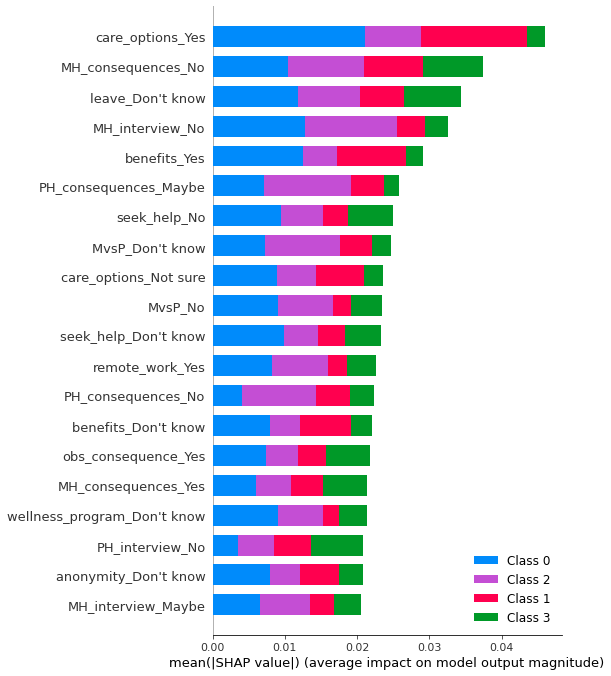

In [104]:
# Plot values to see how features impact target predictions
shap.summary_plot(shap_values, features_df_new)

Shap library returns shap values as a list of arrays, one for each target response. My target was recoded to values 0-3, with 3 equalling the highest value for work interference as "often". Shap will allow me to look specificially at that array, for more detailed appearance of how features impact my target when feature values are high or low.

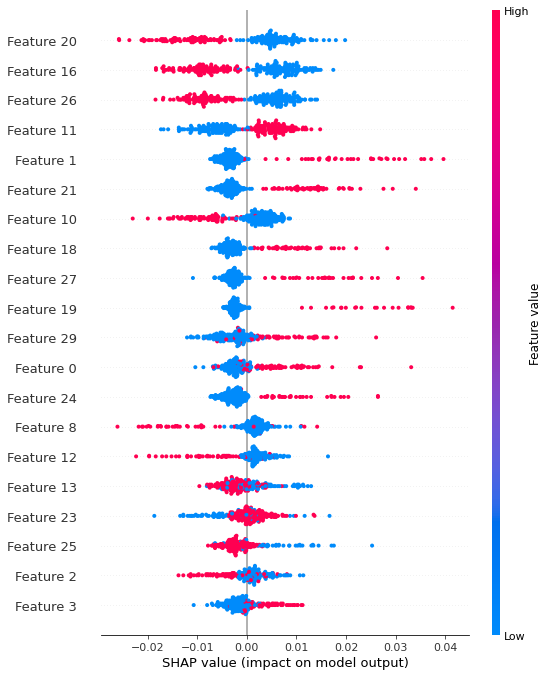

In [105]:
# Plot values to see how features impact target predictions
shap.summary_plot(shap_values[3], test_features_kbest)

### Overview  
Without a model I would have a 25% odds of guessing the work interference value from my dataset. Gridsearch found a random forest classifier to be my best model for predicting, which impoved my prediction odds from a random guess by double(roughly 50%). Feature reduction with chi squared improved my model by less than a point. However, the purpose of this model is not to predict perfectly, but as perfectly as possible to identify features that may inform company practices or offerings. In that respect, my visualizations provide the groundwork for detailing those insights. 